In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import keras 
from sklearn.metrics import accuracy_score

In [2]:
X = pd.read_csv("X_vuler.csv")
y = pd.read_csv("y_vuler.csv")

In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.006992,0.330995,0.057496,-0.185290,-0.090019,-0.142919,-0.176528,0.083868,0.226378,0.239508
1,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,...,-0.011493,0.364530,0.031768,-0.208923,0.037226,-0.147588,-0.187923,0.295009,0.226637,0.151747
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.027805,0.254084,0.005854,0.011469,-0.028520,-0.135576,-0.188109,0.165052,0.242513,0.125674
3,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.082509,0.302689,-0.047866,-0.143165,-0.059064,-0.181441,-0.115376,0.224959,0.138309,0.136934
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,...,0.100599,0.200441,0.000968,-0.159345,-0.087229,-0.113023,-0.200796,0.190178,0.308672,0.120115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.078314,0.324535,0.000486,-0.197408,0.037829,-0.155507,-0.127455,0.167128,0.245253,0.142011
49996,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.043555,0.251954,0.015425,-0.183223,-0.072834,-0.070305,-0.220489,0.101243,0.222711,0.085498
49997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007001,0.223416,-0.162386,-0.056635,0.024415,-0.067374,-0.231825,0.424065,0.289715,0.224395
49998,0.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,...,-0.010709,0.265912,-0.015667,-0.130313,-0.082296,-0.208348,-0.201973,0.202858,0.164556,0.194055


In [4]:
y

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# MODEL_1

In [25]:
model = keras.Sequential([
    keras.layers.Input(shape=(163,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(13, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.015),
              metrics=['mean_squared_error'])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
469/469 [==============================] - 3s 3ms/step - loss: 54.1008 - mean_squared_error: 0.0851 - val_loss: 64.1788 - val_mean_squared_error: 0.1002
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 230.4447 - mean_squared_error: 0.1091 - val_loss: 112.4870 - val_mean_squared_error: 0.0933
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 424.9541 - mean_squared_error: 0.1201 - val_loss: 378.9999 - val_mean_squared_error: 0.1171
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 607.3453 - mean_squared_error: 0.1229 - val_loss: 434.1516 - val_mean_squared_error: 0.0884
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 824.1025 - mean_squared_error: 0.1252 - val_loss: 608.1507 - val_mean_squared_error: 0.1161
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 1000.0630 - mean_squared_error: 0.1274 - val_loss: 599.9427 - val_mean_squared_error: 0.1242

C:\Users\Le  Tran Gia Lac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Le  Tran Gia Lac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Le  Tran Gia Lac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

<Axes: >

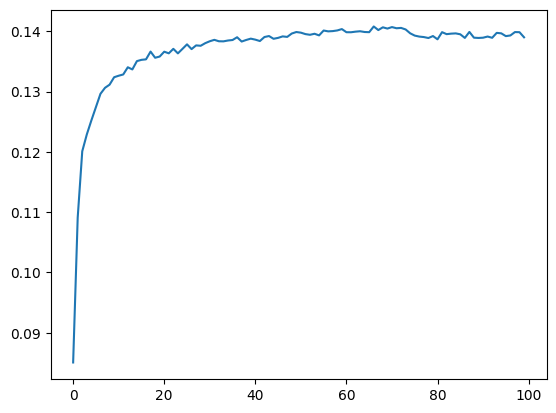

In [27]:
import seaborn as sns
sns.lineplot(history.history['mean_squared_error'])

In [28]:
model.evaluate(X_test, y_test)

391/391 [==============================] - 1s 1ms/step - loss: 37274.1797 - mean_squared_error: 0.1365


[37274.1796875, 0.13651049137115479]

# MODEL_2

In [18]:
model_2 = keras.Sequential([
    keras.layers.LSTM(16, input_shape=(163, 1), return_sequences=True),
    keras.layers.MaxPooling1D(pool_size=2, strides=1),
    keras.layers.LSTM(10),
    keras.layers.Dense(13, activation='softmax'), 
])
model_2.compile(loss='categorical_crossentropy', 
                optimizer=tf.optimizers.Adam(learning_rate=0.02), 
                metrics=['mean_squared_error'])

In [19]:
history = model_2.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.25)

Epoch 1/10
152/440 [=========>....................] - ETA: 20s - loss: 2.8090 - mean_squared_error: 0.0814

In [ ]:
model_2.evaluate(X_test, y_test)

391/391 [==============================] - 8s 21ms/step - loss: 2.9784 - mean_squared_error: 0.0823


[2.9783949851989746, 0.08233523368835449]

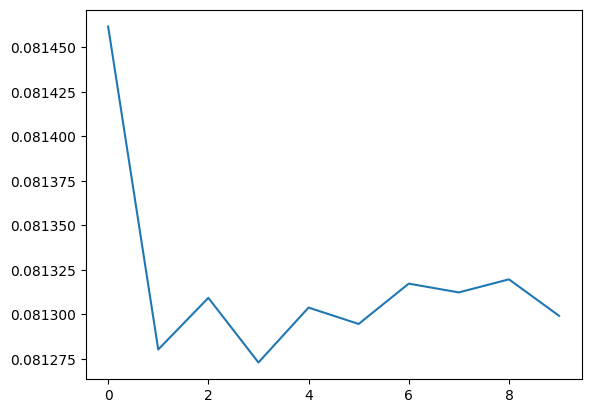

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(history.history['mean_squared_error'], label='Training Loss')
plt.show()
